In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/Fish.csv")

In [4]:
data.groupby(["Species"]).describe()

Weight                                                         \
           count        mean         std    min     25%     50%     75%   
Species                                                                   
Bream       35.0  617.828571  209.205709  242.0  462.50  610.00  717.00   
Parkki      11.0  154.818182   78.755086   55.0  105.00  145.00  185.00   
Perch       56.0  382.239286  347.617717    5.9  120.00  207.50  692.50   
Pike        17.0  718.705882  494.140765  200.0  345.00  510.00  950.00   
Roach       20.0  152.050000   88.828916    0.0  104.25  147.50  171.75   
Smelt       14.0   11.178571    4.131526    6.7    8.95    9.85   12.20   
Whitefish    6.0  531.000000  309.602972  270.0  279.00  423.00  735.00   

                  Length1             ...     Height          Width            \
              max   count       mean  ...        75%      max count      mean   
Species                               ...                                       
Bream      1000.0    35.0  30.305714  ...  16.360900  18.9570  35.0  5.427614   
Parkki      300.0    11.0  18.727273  ...  10.041100  11.3680  11.0  3.220736   
Perch      1100.0    56.0  25.735714  ...  10.846500  12.8002  56.0  4.745723   
Pike       1650.0    17.0  42.476471  ...   8.926200  10.8120  17.0  5.086382   
Roach       390.0    20.0  20.645000  ...   7.164150   9.4850  20.0  3.657850   
Smelt        19.9    14.0  11.257143  ...   2.261225   2.9322  14.0  1.340093   
Whitefish  1000.0     6.0  28.800000  ...  11.506900  12.3540   6.0  5.473050   

                                                                 
                std     min       25%     50%       75%     max  
Species                                                          
Bream      0.721509  4.0200  4.943400  5.2801  6.071600  6.7497  
Parkki     0.643347  2.3142  2.795550  3.2928  3.537000  4.2340  
Perch      1.774626  1.4080  3.525000  4.1549  6.448125  8.1420  
Pike       1.140269  3.3756  4.322500  4.8700  6.144000  7.4800  
Roach      0.690371  2.2680  3.317325  3.6027  3.852900  5.3550  
Smelt      0.286611  1.0476  1.161475  1.2731  1.356300  2.0672  
Whitefish  1.194258  4.2476  4.356775  5.6033  6.552750  6.5736  

[7 rows x 48 columns]

In [5]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def h(x,theta):
    return Sigmoid(x.dot(theta))

In [7]:
def bigH(x):
    hs = []
    for i in range(len(thetas)):
        hs.append(h(x,thetas[i]))
    return (hs.index(max(hs)))

In [8]:
def J(X,y,theta,m):
    hx = h(X,theta)
    return (-y.transpose().dot(np.log(hx))-(1-y.transpose()).dot(np.log(1-hx)))/m

In [9]:
def Gradient(X,theta,lr,m):
    return theta - lr*X.transpose().dot(h(X,theta)-y)/m

In [10]:
names = data["Species"].drop_duplicates().values

thetas = []
y_history = []

X = data.drop(["Species"],axis=1)
X = (X - X.mean())/X.std()
X = X.values
X = np.insert(X,0,1,axis=1)

for i in range(names.size):

    tmp_name = names[i]
    tmp_names = np.delete(names,i)
    
    dic = {i : 0 for i in tmp_names}
    dic[tmp_name] = 1
    
    lr = 13

    y = data["Species"]

    y = y.replace(dic).values

    n = X.shape[1]
    m = X.shape[0]

    EPOCH = 1000

    theta = np.zeros(n)
    
    for j in range(EPOCH):
        theta = Gradient(X,theta,lr,m)
        print(J(X,y,theta,m))
    
    thetas.append(theta)
    y_history.append(y)

1.654219203276391
1.777856248192064
3.0809522518487724
0.0517691607098153
0.03104247558907098
0.02462473999571167
0.021788325617152278
0.020359886214959686
0.019573382238914718
0.019103332502957607
0.018797949148182183
0.018582156544224595
0.01841707235151629
0.018281742885919626
0.018164481576563564
0.01805857958788169
0.0179600930127105
0.017866657284575704
0.01777683049851544
0.017689719465392426
0.017604761968369596
0.01752159772540433
0.01743999085802298
0.01735978279628084
0.017280863418959447
0.017203153238766415
0.017126592336107808
0.01705113344582354
0.01697673761492741
0.01690337146022986
0.016831005426110764
0.0167596126701652
0.016689168344599648
0.016619649128063994
0.016551032916615763
0.016483298616251914
0.01641642600059603
0.016350395610634207
0.016285188681789454
0.016220787088937146
0.01615717330333691
0.016094330357602358
0.016032241816199926
0.01597089174984463
0.01591026471272331
0.015850345721838348
0.015791120237998685
0.01573257414813707
0.01567469374873158
0.

<ipython-input-8-05964bd50a62>:3: RuntimeWarning: divide by zero encountered in log
  return (-y.transpose().dot(np.log(hx))-(1-y.transpose()).dot(np.log(1-hx)))/m



0.36889236837494543
0.398030904371895
0.3483895331967332
0.37528429284621506
0.3401072021358589
0.37490015969546264
0.3436703510703375
0.39924501371770893
0.3615846692360844
0.46259471385108164
0.39652981930563375
0.5805628217175571
0.44141594076736024
0.7258794538161888
0.5279187661983719
1.0028262864047717
0.6830937289278555
1.3858333929503692
0.6045753124353698
1.1387363882913115
0.5185888388941975
0.8270720470413474
0.43441876023964904
0.5374245291750368
0.3901524596437222
0.43963383347000623
0.36208655225647335
0.3982367313763037
0.34732293202006
0.385421913477469
0.3446068933641527
0.39680334141921847
0.3546641824962479
0.4390989356454903
0.3791353606006529
0.5238276954659696
0.41311426159193126
0.6354895062773942
0.45768751189803397
0.7777710614749433
0.5565262649355923
1.0829634528968757
0.6836666668776695
1.371612529238012
0.5763147235964137
1.0440630300843503
0.47804158867583696
0.691117257695016
0.4080709408551222
0.4736052553385309
0.3674168119160012
0.3994564450536058
0.3

In [11]:
ys = np.zeros((len(thetas),m))
yp = np.zeros((len(thetas),m))

for i in range(len(thetas)):
    for j in range(m):
        if(h(X[j:j+1],thetas[i]) < 0.5):
            ys[i][j] = 0
        else:
            ys[i][j] = 1
            
for i in range(len(thetas)):
    for j in range(m):
        yp[i][j] = h(X[j:j+1],thetas[i])

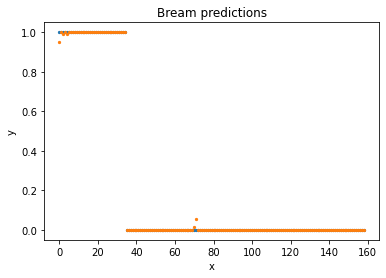

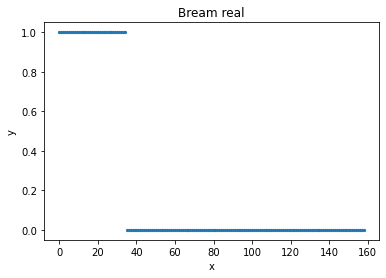

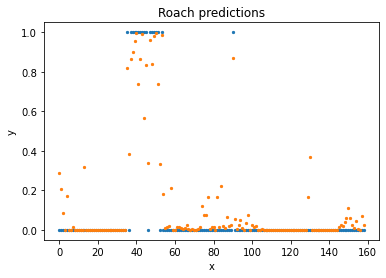

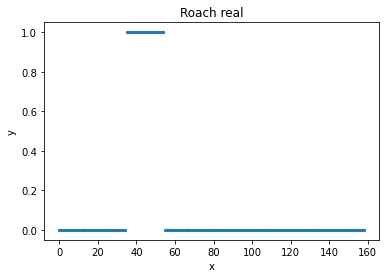

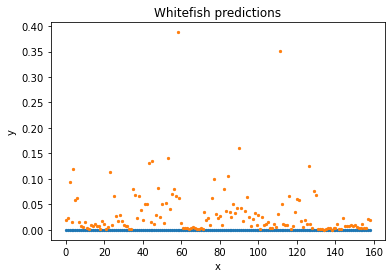

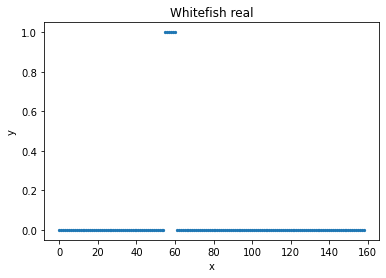

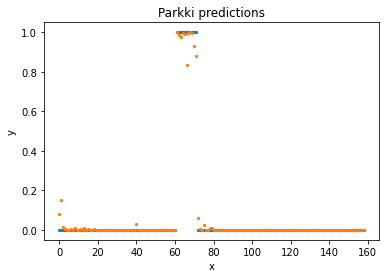

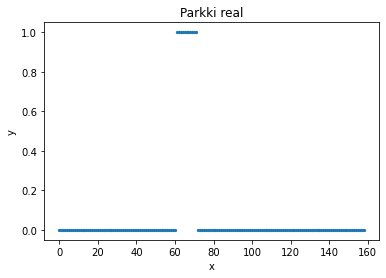

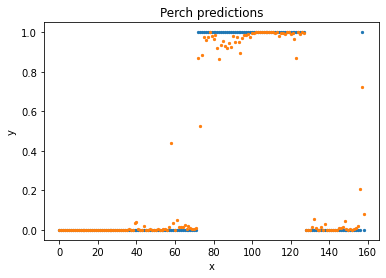

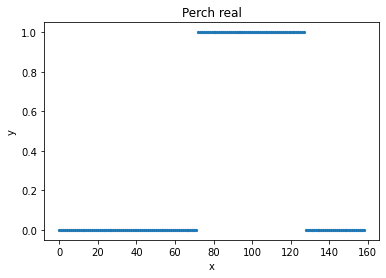

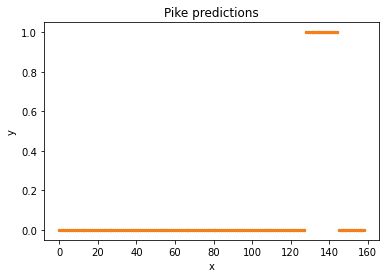

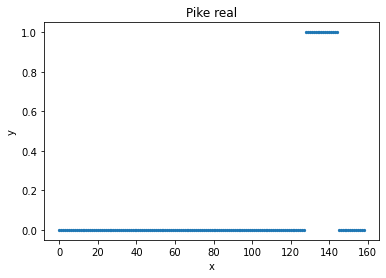

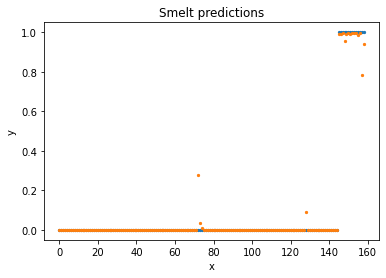

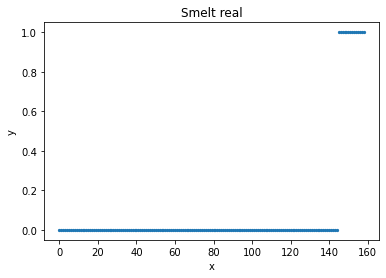

In [12]:
x = range(m)

for i in range(len(ys)):
    plt.scatter(x,ys[i],s=5)
    plt.scatter(x,yp[i],s=5)
    
    plt.title(names[i]+' predictions')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

    plt.scatter(x,y_history[i],s=5)
    plt.title(names[i]+' real')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

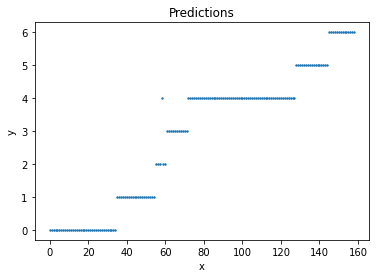

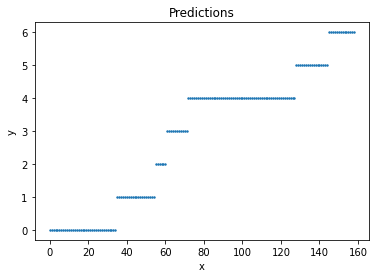

In [13]:
yp = []

names = data["Species"].drop_duplicates().values
listOfInt = range(names.size)

zipbObj = zip(names, listOfInt)
dic = dict(zipbObj)
y = data["Species"]
y = y.replace(dic).values


for i in range(m):
    yp.append(bigH(X[i:i+1]))

plt.scatter(x,yp,s=2)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(x,y,s=2)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()